In [1]:
# Libraries
import random
import time
import matplotlib.pyplot as plt
import numpy as np
from decimal import Decimal, getcontext
from scipy.optimize import curve_fit
from IPython.display import display, HTML

In [2]:
# Theoretical complexities functions

def o_n(x, a, b):
    return a*x + b

def o_nlogn(x, a, b):
    return a*x*np.log(x) + b

def o_n2(x, a, b):
    return a*(x**2) + b

def o_n3(x, a, b):
    return a*(x**3) + b

In [3]:
# Average time function

def measure_avg_times(func, limit=2000, repeats=5):
    times = []
    for i in range(1, limit+1):
        v = [random.randint(0, 100) for _ in range(i)]
        start_time = time.time()
        for _ in range(repeats):
            func(v)
        end_time = time.time()
        avg_time = (end_time - start_time) / repeats
        times.append(avg_time)
    
    return times

In [4]:
# Plot function

def plot_times(times, title, complexity=None, xlabel='n', ylabel='Average Execution Time (seconds)', save_filename="plot.png"):
    
    n_values = np.arange(1, len(times) + 1)
    
    fitted = None
    func = None
    
    if complexity == 'n':
        func = o_n
    elif complexity == 'nlogn':
        func = o_nlogn
    elif complexity == 'n2':
        func = o_n2
    elif complexity == 'n3':
        func = o_n3
        
    if func:
        params, _ = curve_fit(func, n_values, times)
        fitted = func(n_values, *params)
    
    plt.figure(figsize=(10, 5))
    plt.plot(n_values, times)
    
    if fitted is not None:
        plt.plot(n_values, fitted, label=f'Fitted {complexity}', linestyle='--', color='red')
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.savefig(save_filename, bbox_inches='tight', facecolor='white', edgecolor='none')
    plt.show()
    
    display(HTML(f'<a href="{save_filename}" download>Click me</a>'))

# Functions

In [5]:
#1. Constant fucntion
def f_const(v):
    return 1

In [6]:
#2. Sum of elements
def f_sum(v):
    return sum(v)

In [7]:
#3. Product of elements
def f_product(v):
    product = 1
    for elem in v:
        product *= elem
    return product

In [8]:
# 4.1 Direct method and 4.2 Horner's method
getcontext().prec = 10

x_value = Decimal('1.5')

def evaluate_directly(v, x = x_value):
    return sum([Decimal(coeff) * (x**i) for i, coeff in enumerate(v)])

def evaluate_horner(v, x = x_value):
    result = v[-1]
    for coeff in reversed(v[:-1]):
        result = result * x + coeff
    return result

In [9]:
# 5. Bubble sort
def bubble_sort(v):
    n = len(v)
    for i in range(n):
        swapped = False
        for j in range(0, n-i-1):
            if v[j] > v[j+1]:
                v[j], v[j+1] = v[j+1], v[j]
                swapped = True
        if not swapped:
            break

In [10]:
#6. Quick sort
def quick_sort(v):
    if len(v) <= 1:
        return v
    else:
        pivot = v.pop()
        less_than_pivot = []
        greater_than_pivot = []
        for element in v:
            if element <= pivot:
                less_than_pivot.append(element)
            else:
                greater_than_pivot.append(element)
        return quick_sort(less_than_pivot) + [pivot] + quick_sort(greater_than_pivot)

In [11]:
#7. Timsort
# Tim sort is a default sorting algorithm in sorted() function
def timsort(v):
    return sorted(v.copy())


# Graphs

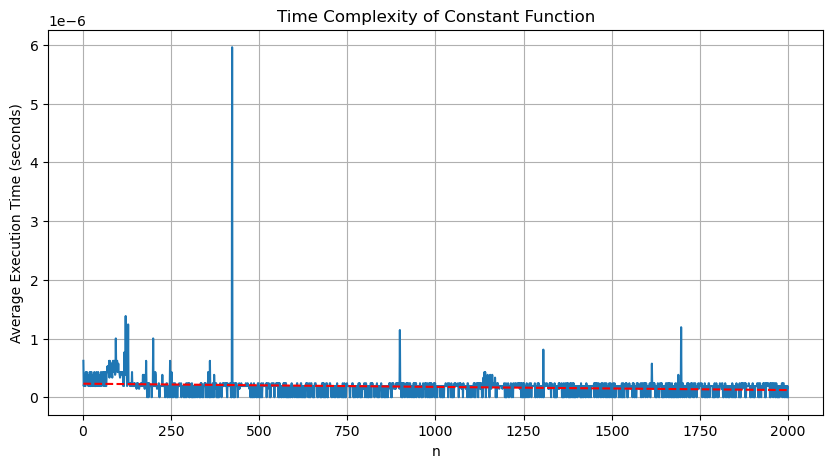

In [12]:
plot_times(measure_avg_times(f_const), complexity = 'n', title = 'Time Complexity of Constant Function')
# Here the slope coefficient will be fitted to 0, and we will have a const (line)

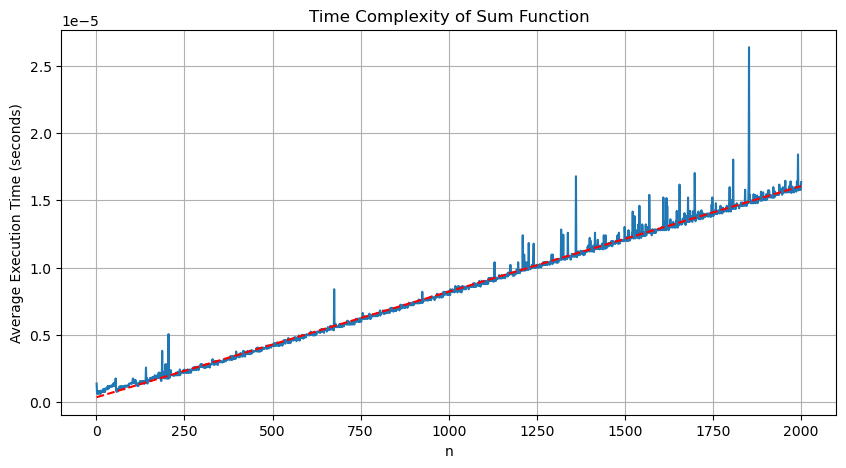

In [13]:
plot_times(measure_avg_times(f_sum), complexity = 'n', title = 'Time Complexity of Sum Function')

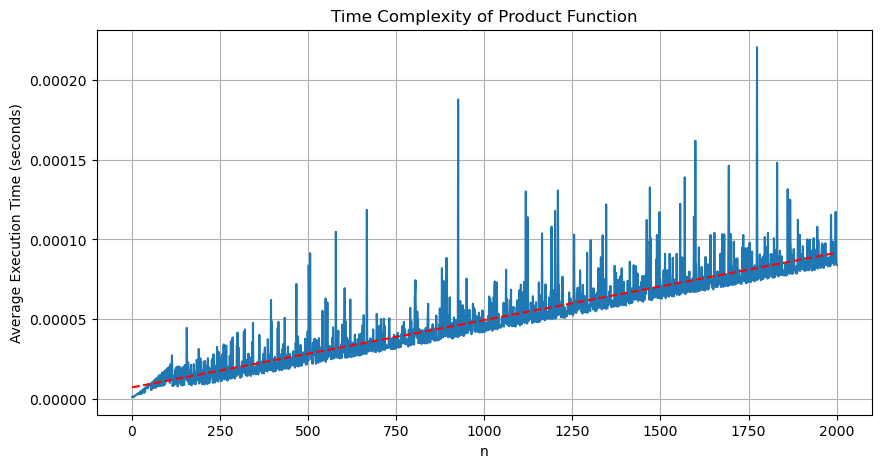

In [14]:
plot_times(measure_avg_times(f_product), complexity = 'n', title = 'Time Complexity of Product Function')

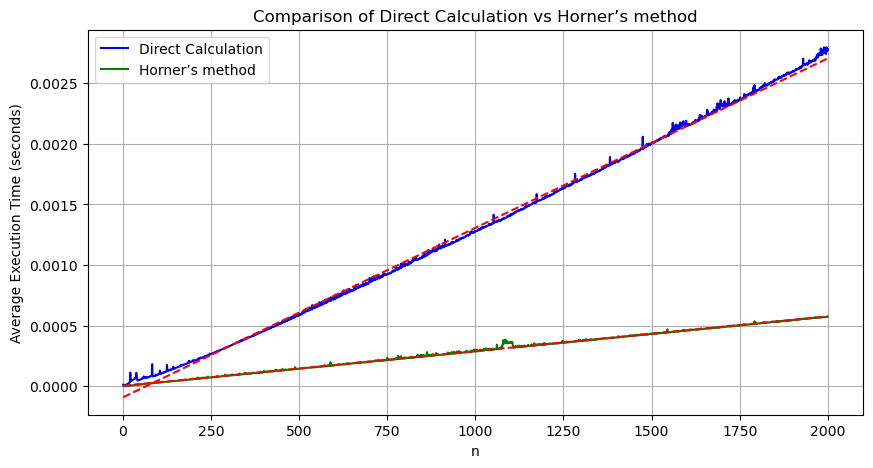

In [15]:
direct_times = measure_avg_times(evaluate_directly)
horner_times = measure_avg_times(evaluate_horner)

n_values = np.arange(1, len(direct_times) + 1)

params, _ = curve_fit(o_n, n_values, direct_times)
fitted_direct = o_n(n_values, *params)

params, _ = curve_fit(o_n, n_values, horner_times)
fitted_horner = o_n(n_values, *params)

plt.figure(figsize=(10, 5))

plt.plot(range(1, 2001), direct_times, label='Direct Calculation', color='blue')
plt.plot(range(1, 2001), horner_times, label='Horner’s method', color='green')
plt.plot(n_values, fitted_direct, linestyle='--', color='red')
plt.plot(n_values, fitted_horner, linestyle='--', color='red')
plt.xlabel('n')
plt.ylabel('Average Execution Time (seconds)')
plt.title('Comparison of Direct Calculation vs Horner’s method')
plt.grid(True)
plt.legend()
plt.savefig("plot.png", bbox_inches='tight', facecolor='white', edgecolor='none')
plt.show()
display(HTML(f'<a href="plot.png" download>Click me</a>'))

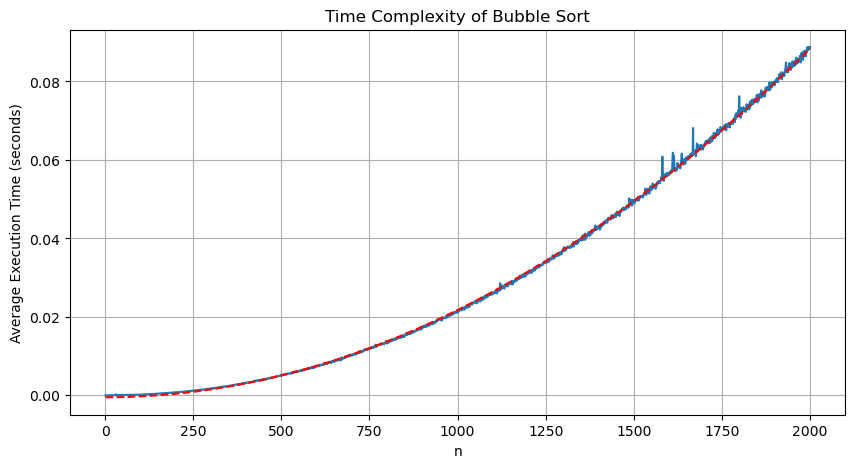

In [16]:
plot_times(measure_avg_times(bubble_sort), complexity = 'n2', title = 'Time Complexity of Bubble Sort')

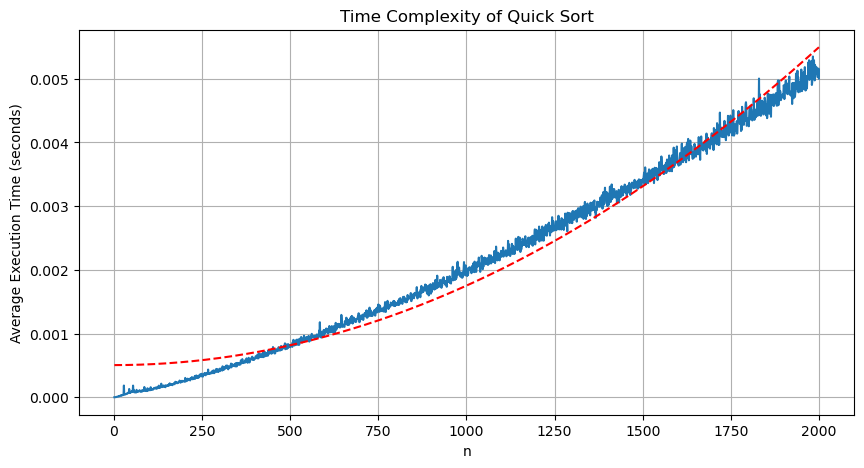

In [17]:
plot_times(measure_avg_times(quick_sort), complexity = 'n2', title = 'Time Complexity of Quick Sort')

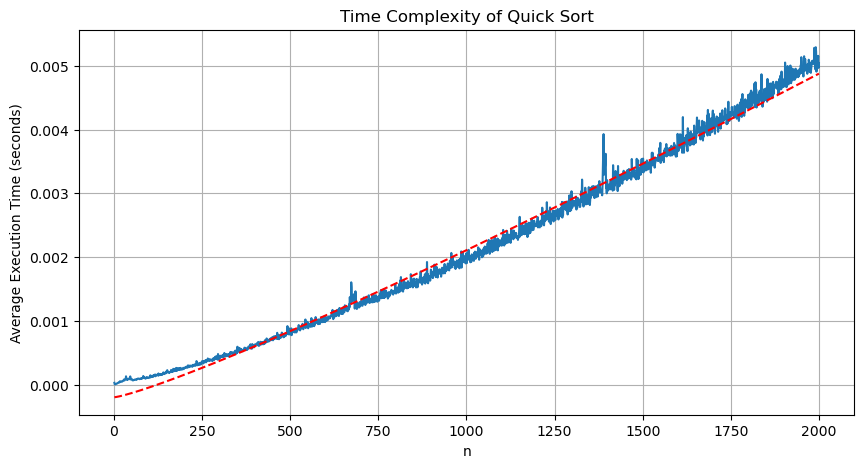

In [18]:
plot_times(measure_avg_times(quick_sort), complexity = 'nlogn', title = 'Time Complexity of Quick Sort')

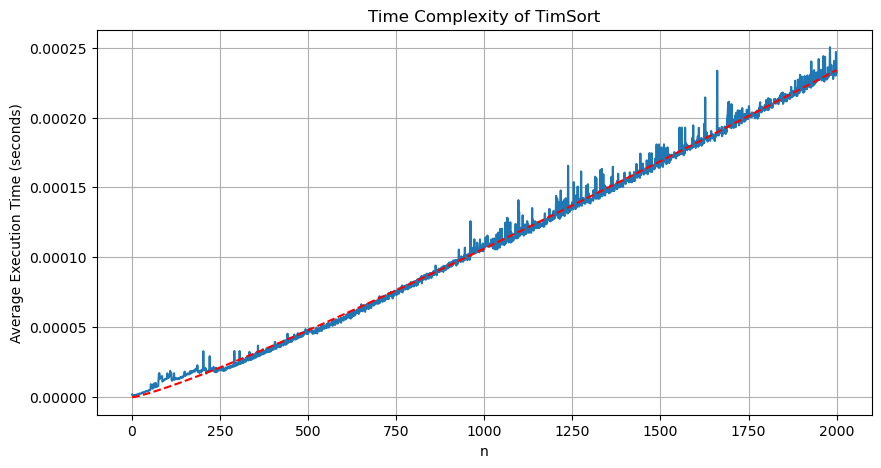

In [19]:
plot_times(measure_avg_times(timsort), complexity = 'nlogn', title = 'Time Complexity of TimSort')

# Generate random matrices 𝐴 and 𝐵 of size 𝑛 × 𝑛 with non-negative elements. Find the usual matrix product for 𝐴 and 𝐵.

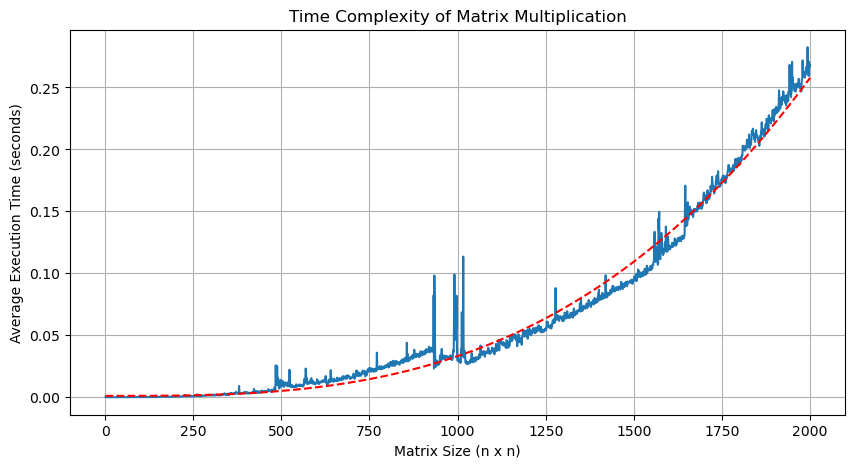

In [21]:
# II. Random matrices

matrix_times = []

for n in range(1, 2001):
    total_time = 0
    
    for _ in range(5):
        A = np.random.rand(n, n)
        B = np.random.rand(n, n)
        
        start_time = time.time()
        np.dot(A, B)
        end_time = time.time()
        
        total_time += (end_time - start_time)
    
    avg_time = total_time / 5
    matrix_times.append(avg_time)
    
n_values = np.arange(1, len(direct_times) + 1)

params, _ = curve_fit(o_n3, n_values, matrix_times)
fitted = o_n3(n_values, *params)
    
plt.figure(figsize=(10, 5))    
plt.plot(n_values, matrix_times)
plt.plot(n_values, fitted, linestyle='--', color='red')
plt.xlabel('Matrix Size (n x n)')
plt.ylabel('Average Execution Time (seconds)')
plt.title('Time Complexity of Matrix Multiplication')
plt.grid(True)
plt.savefig("plot.png", bbox_inches='tight', facecolor='white', edgecolor='none')
plt.show()
display(HTML(f'<a href="plot.png" download>Click me</a>'))